### 정밀도(precision)와 재현율(recall) 트레이드오프
- threshlod를 강제로 바꿔 정밀도(precision)와 재현율(recall)을 조정하는 것
- 보통 잘 쓰지는 않는다 -> 모델 성능을 개선시키지는 않는다

### 정밀도 (precision)
- 모델의 결과가 얼마나 정밀(precise)한가?
- 모델의 결과가 정확하고 치밀하고 빈틈이 없는가?
- 모델의 결과를 믿어도 되는가?
- 모델이 Positive라고 말하는 것은 정말 Positive인가?
- 정밀도가 낮은 경우: False Positive가 많은 경우 (예: 의심스러우면 무조건 암이야!)
- 즉, 모델 결과물의 신뢰도가 낮으면 정밀도가 낮다.

### 재현율 (recall)
- 모델이 얼마나 일관적인가?
- 모델에 비슷한 입력을 넣으면 비슷한 결과가 나오는가?
- 모델 자체가 재현성을 갖는가?
- Positive를 넣으면 정말 Positve로 나오는가?
- 재현율이 낮은 경우: False Negative가 많은 경우 (예: 완전 확실한 것만 암이야!)
- 즉, 모델이 놓치는 것이 많으면 재현율이 낮다.

In [2]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
# index_col=0 : csv파일을 불러올 시 새로운 컬럼(=unnamed : 0)을 생성시키지 않고 파일을 불러오겠다는 명령어
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
from sklearn.model_selection import train_test_split

wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
                        # solver = : 최적화 알고리즘 설정, 데이터가 적으면 'liblinear'로 설정
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Train ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.7425437752549547
Train ACC :  0.7438461538461538


### classification_report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       477
           1       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



### 해석
- 0.68 : 0 이라고 예측한 값들 중에서 0 일 확률, 0.77 : 1 이라고 예측한 것들 중에서 1 일 확률
- 0.58 : 실제 0 중에서 0 이라고 예측해서 맞춘 확률, 0.84 : 실제 1 중에서 1 이라고 예측해서 맞춘 확률
- surport 477, 823 : 전체 데이터 1300개 중 0 은 477개, 1은 823개 존재
- macro avg : 각 클래스 별 precision, recall, f1-score 등의 평균 ex. (0.68 + 0.77) = 0.73
- weighted avg : 각 클래스 별 분포를 반영한 precision, recall, f1-score 등의 평균 ex. 0.68(477/1300) + 0.77(823/1300) 

### confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

### 해석
- 전체 0 중에서 275개를 0이라고 예측해서 맞췄고 202개를 1이 라고 예측해서 틀렸다
- 전체 1 중에서 131개를 1이라고 예측해서 맞첬고 692개를 0이라고 예측해서 틀렸다

### precision_recall curve

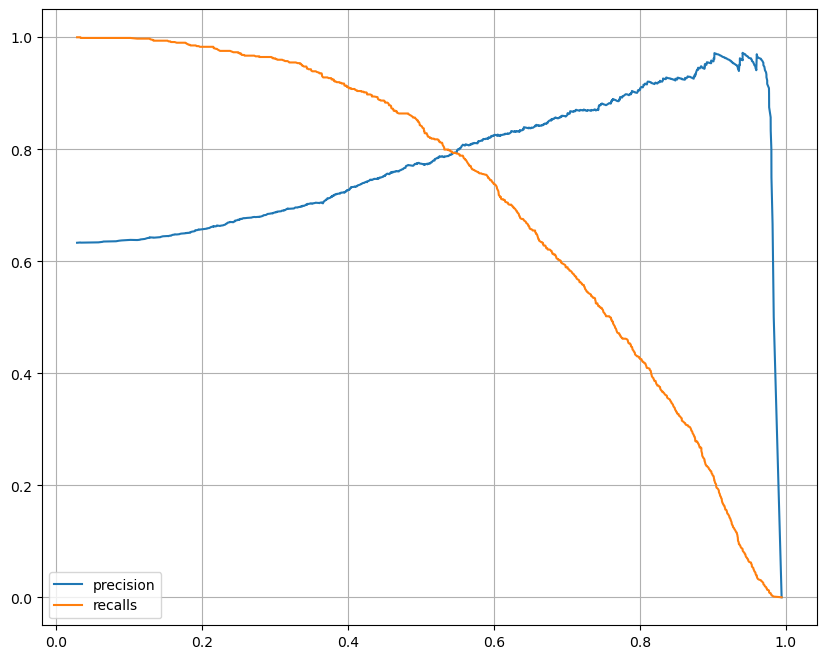

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
            # predict_proba() : 예측된 값이 속성(여기선 taste의 0 or 1)들 중 얼마나 비중을 차지하는지 보여주는 함수
            #.predict_proba(X_test)[:, 1] : 여기선 taste의 '1'일 확률들만의 값으로 가져온다는 설정
precisions, recalls, thershlods = precision_recall_curve(y_test, pred)
plt.plot(thershlods, precisions[:len(thershlods)], label = 'precision')
plt.plot(thershlods, recalls[:len(thershlods)], label = 'recalls')
plt.grid(); plt.legend(); plt.show()


### 해석 
- 만약 thershlods 을 0.2로 설정하면 recall 은 높은 값(ex. 약0.98)을 취하고 precision 은 상대적으로 낮은 값(ex. 0.64)을 취한다
- 만약 thershlods 을 0.8로 설정하면 precision 은 높은 값(ex. 0.90)을 취하고 recall 은 상대적으로 낮은 값(ex. 0.42)을 취한다
- thershlods 변경하면 recall과 precision 값들을 변경시킬 수 있다

### threshlod = 0.5

In [12]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40511422, 0.59488578],
       [0.50942858, 0.49057142],
       [0.1021066 , 0.8978934 ]])

### pred_proba와 y_pred_test 결합 : reshape
- pred_proba와 결합가기 위해 y_pred_test를 리스트 안의 리스트 구조로 변경
- reshape(행, 열)
- 행(row)의 위치에 -1을 넣고 열의 값을 지정해주면 변환될 배열의 행의 수는 알아서 지정

In [14]:
pred_proba
# 리스트 안의 리스트 구조

array([[0.40511422, 0.59488578],
       [0.50942858, 0.49057142],
       [0.1021066 , 0.8978934 ],
       ...,
       [0.2253031 , 0.7746969 ],
       [0.67385289, 0.32614711],
       [0.31468732, 0.68531268]])

In [16]:
y_pred_test

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [17]:
# pred_proba와 결합하기 위해 y_pred_test를 리스트 안의 리스트 구조로 변경하고 행과 열을 맞춰준다
y_pred_test.reshape(-1, 1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [13]:
import numpy as np
# concatenate([a, b, ..], axis=) : [] = (합칠 배열), axis= 합칠 방향(1 = 세로, 0 = 가로)
np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40511422, 0.59488578, 1.        ],
       [0.50942858, 0.49057142, 0.        ],
       [0.1021066 , 0.8978934 , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        ],
       [0.67385289, 0.32614711, 0.        ],
       [0.31468732, 0.68531268, 1.        ]])

### threshlod 바꾸기_Binarizer
- Binarizer를 통해 thershlods를 사용자의 지정을 받아 바꿔가면서 0, 1의 결과를 바꿔주는 것

In [20]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
                                        # [:, 1] : 여기선 taste의 '1'일 확률들만의 값으로 가져온다는 설정
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [21]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       477
           1       0.82      0.74      0.78       823

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.74      0.74      1300



### 해석
- threshold 변경하여 precision과 recall의 값을 변경시킬 수 있다